In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [226]:
# Load the data
assay_df = pd.read_csv('assay.csv')

# Transpose the DataFrame to make samples the rows and features the columns
assay_df = assay_df.set_index('Unnamed: 0').T

# Reset the index to have Sample_ID as a column (optional, based on your needs)
assay_df.index.name = 'Sample_ID'
assay_df.reset_index(inplace=True)

assay_df

Unnamed: 0,Sample_ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000269781,ENSG00000269806,ENSG00000269811,ENSG00000269821,ENSG00000269825,ENSG00000269832,ENSG00000269836,ENSG00000269845,ENSG00000269858,ENSG00000269867
0,MSCCR_reGRID_10_Biopsy_18,3.282109,3.051592,3.893769,3.220025,3.406306,5.658866,3.707125,5.070256,4.978836,...,2.776541,4.391211,1.391350,9.134413,3.557446,3.576059,2.475925,3.463102,5.061965,3.001097
1,MSCCR_reGRID_102_Biopsy_206,2.670523,2.439695,3.888431,3.282394,3.989928,6.452259,3.947747,4.682149,4.933733,...,3.656788,4.311648,2.713774,10.085740,3.203422,3.120257,3.564322,3.335797,5.142695,3.308759
2,MSCCR_reGRID_1082_Biopsy_1836,2.783300,2.762037,4.125193,2.909566,4.611266,6.229693,4.048762,5.117177,4.936257,...,2.671949,4.691491,4.615768,9.773128,2.832159,3.942805,1.513363,3.292432,5.139592,2.777542
3,MSCCR_reGRID_109_Biopsy_218,2.850988,2.880351,3.692282,3.088476,4.869509,6.614671,3.699663,4.935450,4.621441,...,2.038725,3.571639,2.570162,9.316637,3.043355,2.829454,3.455203,2.148175,5.139839,2.937500
4,MSCCR_reGRID_110_Biopsy_221,3.344015,2.693684,3.909606,2.986980,4.863229,6.622103,3.797232,4.475965,4.563740,...,2.725807,3.933595,3.007471,9.577393,4.086387,3.443579,5.050581,2.841009,5.017969,2.730428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,MSCCR_reGRID_955_Biopsy_1697,3.845150,3.140144,4.239018,3.314539,3.341825,5.798392,4.273415,5.260336,4.705508,...,2.829351,3.382299,2.169466,9.490207,3.701591,3.357730,2.005639,3.383760,4.958209,3.296478
244,MSCCR_reGRID_966_Biopsy_1710,3.798863,2.892458,3.704641,3.395679,4.077357,6.721103,4.134204,4.946780,4.831558,...,2.676107,2.888373,3.323391,9.731853,3.033523,2.990423,2.465758,3.034856,4.918018,2.517111
245,MSCCR_reGRID_97_Biopsy_195,3.128382,2.912159,3.906236,3.543047,3.052167,6.717317,4.160850,4.978164,4.940073,...,3.180509,3.712173,3.192006,9.829750,3.566480,3.247704,3.470245,3.259944,4.521471,2.870563
246,MSCCR_reGRID_98_Biopsy_197,3.532526,2.956192,4.182246,3.195829,4.441920,7.019675,4.119181,5.018810,4.716997,...,2.033499,4.331751,2.173790,9.429173,2.530581,3.954809,2.549261,2.924269,4.647594,2.675062


In [227]:
# Load metadata from CSV into a pandas DataFrame
metadata_df = pd.read_csv('metadata.csv')

# Now you can use metadata_df for your machine learning tasks
print(metadata_df.head())  # Example: Display the first few rows of the metadata

                                               title  \
0  MSCCR_reGRID_10_Biopsy_18, CD participants,Rig...   
1  MSCCR_reGRID_102_Biopsy_206, CD participants,R...   
2  MSCCR_reGRID_1082_Biopsy_1836, CD participants...   
3  MSCCR_reGRID_109_Biopsy_218, CD participants,R...   
4  MSCCR_reGRID_110_Biopsy_221, CD participants,R...   

                       sample_id      individual_id      tissue case_control  \
0      MSCCR_reGRID_10_Biopsy_18    MSCCR_reGRID_10  RightColon      CD_NonI   
1    MSCCR_reGRID_102_Biopsy_206   MSCCR_reGRID_102  RightColon      CD_NonI   
2  MSCCR_reGRID_1082_Biopsy_1836  MSCCR_reGRID_1082  RightColon      CD_NonI   
3    MSCCR_reGRID_109_Biopsy_218   MSCCR_reGRID_109  RightColon      CD_NonI   
4    MSCCR_reGRID_110_Biopsy_221   MSCCR_reGRID_110  RightColon      CD_NonI   

      sex  eligibility_age_at_endo clinician_measure_active disease  severity  \
0  Female                       60                   Active      CD  Inactive   
1    Male           

In [228]:
print(assay_df.describe())


Unnamed: 0  ENSG00000000003  ENSG00000000419  ENSG00000000457  \
count            248.000000       248.000000       248.000000   
mean               3.184308         3.008864         3.858549   
std                0.447157         0.203712         0.198556   
min                0.399113         2.422733         3.137091   
25%                2.960819         2.886912         3.733815   
50%                3.231293         2.993563         3.846005   
75%                3.498509         3.111912         3.997962   
max                4.730405         4.094944         4.408793   

Unnamed: 0  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
count            248.000000       248.000000       248.000000   
mean               3.245257         4.000394         6.113437   
std                0.269960         0.978590         0.746844   
min                2.532279        -2.119365         3.255745   
25%                3.064698         3.400764         5.698957   
50%                3.232

In [229]:
print(metadata_df.describe())

       eligibility_age_at_endo
count               248.000000
mean                 46.266129
std                  15.293940
min                  20.000000
25%                  33.000000
50%                  47.000000
75%                  58.000000
max                  82.000000


In [230]:
print(metadata_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     248 non-null    object
 1   sample_id                 248 non-null    object
 2   individual_id             248 non-null    object
 3   tissue                    248 non-null    object
 4   case_control              248 non-null    object
 5   sex                       248 non-null    object
 6   eligibility_age_at_endo   248 non-null    int64 
 7   clinician_measure_active  207 non-null    object
 8   disease                   248 non-null    object
 9   severity                  229 non-null    object
 10  geo_accession             248 non-null    object
 11  extract_protocol          248 non-null    object
 12  data_processing           248 non-null    object
 13  contact                   248 non-null    object
 14  for_dim_reduce            

In [231]:
print(assay_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Columns: 12957 entries, Sample_ID to ENSG00000269867
dtypes: float64(12956), object(1)
memory usage: 24.5+ MB
None


In [232]:
missing_values = assay_df.isnull().sum()
print(missing_values)

Unnamed: 0
Sample_ID          0
ENSG00000000003    0
ENSG00000000419    0
ENSG00000000457    0
ENSG00000000460    0
                  ..
ENSG00000269832    0
ENSG00000269836    0
ENSG00000269845    0
ENSG00000269858    0
ENSG00000269867    0
Length: 12957, dtype: int64


In [233]:
# Identify the number of missing values in each feature
missing_values = metadata_df.isnull().sum()
print(missing_values)

title                        0
sample_id                    0
individual_id                0
tissue                       0
case_control                 0
sex                          0
eligibility_age_at_endo      0
clinician_measure_active    41
disease                      0
severity                    19
geo_accession                0
extract_protocol             0
data_processing              0
contact                      0
for_dim_reduce               0
dtype: int64


In [234]:
metadata_df.loc[metadata_df.isnull().sum(axis=1)>=3, :]


,title,sample_id,individual_id,tissue,case_control,sex,eligibility_age_at_endo,clinician_measure_active,disease,severity,geo_accession,extract_protocol,data_processing,contact,for_dim_reduce


In [235]:

# Remove control samples and rename categories
metadata_filtered = metadata_df[metadata_df['case_control'] != 'Control_NonI']
metadata_filtered['case_control'] = metadata_filtered['case_control'].replace({
    'CD_NonI': 'NonI',
    'UC_NonI': 'NonI',
    'CD_I': 'Inf',
    'UC_I': 'Inf'
})

# Get the filtered Sample_IDs
filtered_sample_ids = metadata_filtered['sample_id']




/var/folders/2h/bbbvjdx116z_mj6r0q4x6njw0000gn/T/ipykernel_5724/1318814408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_filtered['case_control'] = metadata_filtered['case_control'].replace({


In [236]:
# Filter the assay_df based on the filtered Sample_IDs
assay_filtered = assay_df[assay_df['Sample_ID'].isin(filtered_sample_ids)].drop(['Sample_ID'], axis=1)



# Output the filtered data
print("Filtered Assay Data:\n", assay_filtered)
print("\nFiltered Labels:\n", metadata_filtered)

Filtered Assay Data:
 Unnamed: 0  ENSG00000000003  ENSG00000000419  ENSG00000000457  \
0                  3.282109         3.051592         3.893769   
1                  2.670523         2.439695         3.888431   
2                  2.783300         2.762037         4.125193   
3                  2.850988         2.880351         3.692282   
4                  3.344015         2.693684         3.909606   
..                      ...              ...              ...   
242                1.916513         2.877547         3.682945   
244                3.798863         2.892458         3.704641   
245                3.128382         2.912159         3.906236   
246                3.532526         2.956192         4.182246   
247                3.348571         2.936621         4.036904   

Unnamed: 0  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
0                  3.220025         3.406306         5.658866   
1                  3.282394         3.989928         6.452259   
2 

In [237]:
# Assuming assay_df and metadata_df are already loaded
X = assay_filtered
y = metadata_filtered['case_control']



In [238]:
y


0      NonI
1      NonI
2      NonI
3      NonI
4      NonI
       ... 
242    NonI
244    NonI
245    NonI
246    NonI
247    NonI
Name: case_control, Length: 230, dtype: object

In [239]:

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [240]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [241]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [242]:
y_train

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [243]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Lasso regression model
alpha = 0.1  # Regularization strength
lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1, random_state=42)

Mean Squared Error (MSE): 0.22140524757706928
R-squared (R2): 0.023971866931085994


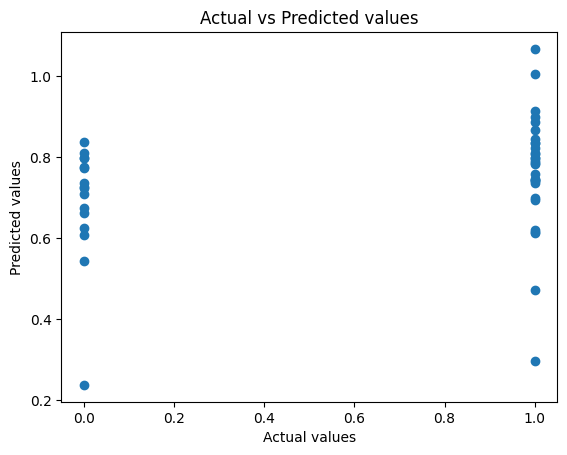

Selected features: Index(['ENSG00000078403', 'ENSG00000118523', 'ENSG00000118985',
       'ENSG00000124226', 'ENSG00000135917', 'ENSG00000140044',
       'ENSG00000140526', 'ENSG00000144619', 'ENSG00000169129',
       'ENSG00000182240', 'ENSG00000183117', 'ENSG00000206075',
       'ENSG00000229358'],
      dtype='object', name='Unnamed: 0')


In [244]:

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Plotting predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

# Inspect the coefficients
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef[coef != 0].index
print(f'Selected features: {selected_features}')

In [245]:
# Inspect the coefficients
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef[coef != 0].index
print(f'Selected features: {selected_features}')


Selected features: Index(['ENSG00000078403', 'ENSG00000118523', 'ENSG00000118985',
       'ENSG00000124226', 'ENSG00000135917', 'ENSG00000140044',
       'ENSG00000140526', 'ENSG00000144619', 'ENSG00000169129',
       'ENSG00000182240', 'ENSG00000183117', 'ENSG00000206075',
       'ENSG00000229358'],
      dtype='object', name='Unnamed: 0')


In [246]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up the grid search
grid_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameter found by grid search
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Train the Lasso regression model with the best alpha
lasso_tuned = Lasso(alpha=best_alpha, random_state=42)
lasso_tuned.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_tuned = lasso_tuned.predict(X_test_scaled)

# Evaluate model performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned R-squared (R2): {r2_tuned}')


Best alpha: 0.1
Tuned Mean Squared Error (MSE): 0.22140524757706928
Tuned R-squared (R2): 0.023971866931085994


In [247]:
# Coefficients of the tuned model
coef_tuned = pd.Series(lasso_tuned.coef_, index=X.columns)
selected_features_tuned = coef_tuned[coef_tuned != 0].index
print(f'Selected features after tuning: {selected_features_tuned}')
print(coef_tuned[coef_tuned != 0])


Selected features after tuning: Index(['ENSG00000078403', 'ENSG00000118523', 'ENSG00000118985',
       'ENSG00000124226', 'ENSG00000135917', 'ENSG00000140044',
       'ENSG00000140526', 'ENSG00000144619', 'ENSG00000169129',
       'ENSG00000182240', 'ENSG00000183117', 'ENSG00000206075',
       'ENSG00000229358'],
      dtype='object', name='Unnamed: 0')
Unnamed: 0
ENSG00000078403    0.007898
ENSG00000118523   -0.005912
ENSG00000118985   -0.001807
ENSG00000124226   -0.024930
ENSG00000135917    0.016102
ENSG00000140044   -0.008557
ENSG00000140526   -0.024868
ENSG00000144619    0.006186
ENSG00000169129   -0.020048
ENSG00000182240   -0.046043
ENSG00000183117    0.000010
ENSG00000206075   -0.034471
ENSG00000229358   -0.003574
dtype: float64


In [248]:
from sklearn.metrics import mean_absolute_error, explained_variance_score

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_tuned)
evs = explained_variance_score(y_test, y_pred_tuned)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Explained Variance Score (EVS): {evs}')


Mean Absolute Error (MAE): 0.3947771441603689
Explained Variance Score (EVS): 0.05872811001897238


In [249]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(lasso_tuned, X_train_scaled)

# Compute SHAP values for the training set
shap_values_train = explainer(X_train_scaled)

# Compute SHAP values for the test set
shap_values_test = explainer(X_test_scaled)


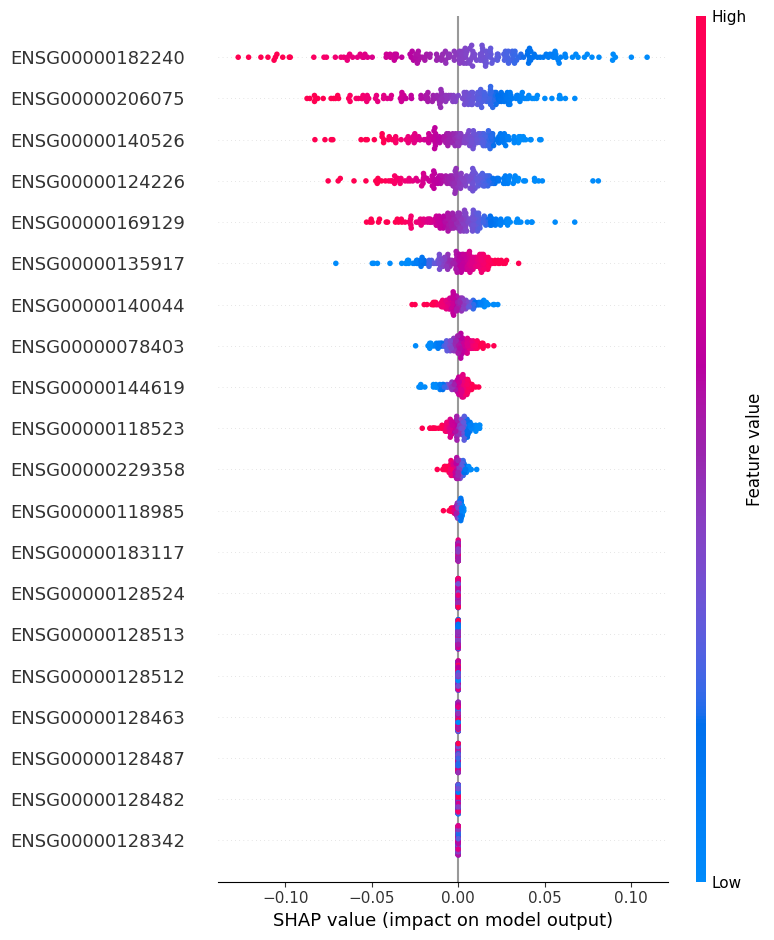

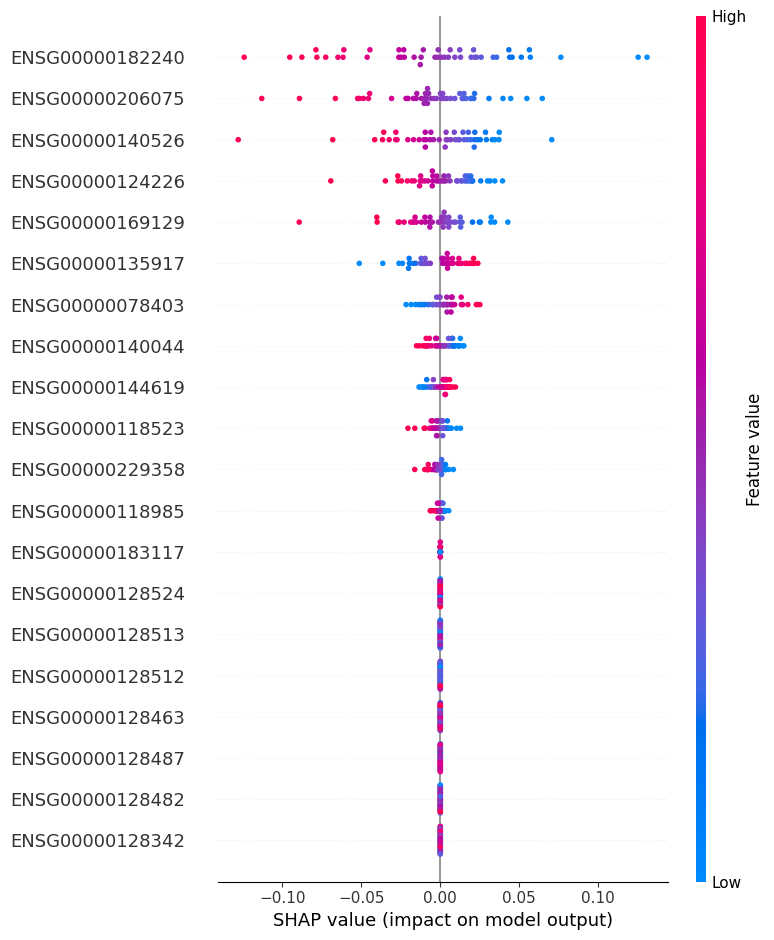

In [250]:
# Summary plot for the training set
shap.summary_plot(shap_values_train, X_train_scaled, feature_names=X.columns)

# Summary plot for the test set
shap.summary_plot(shap_values_test, X_test_scaled, feature_names=X.columns)

# SHAP dependence plot for a specific feature (e.g., the most important feature)
most_important_feature = shap_values_train.feature_names[0]



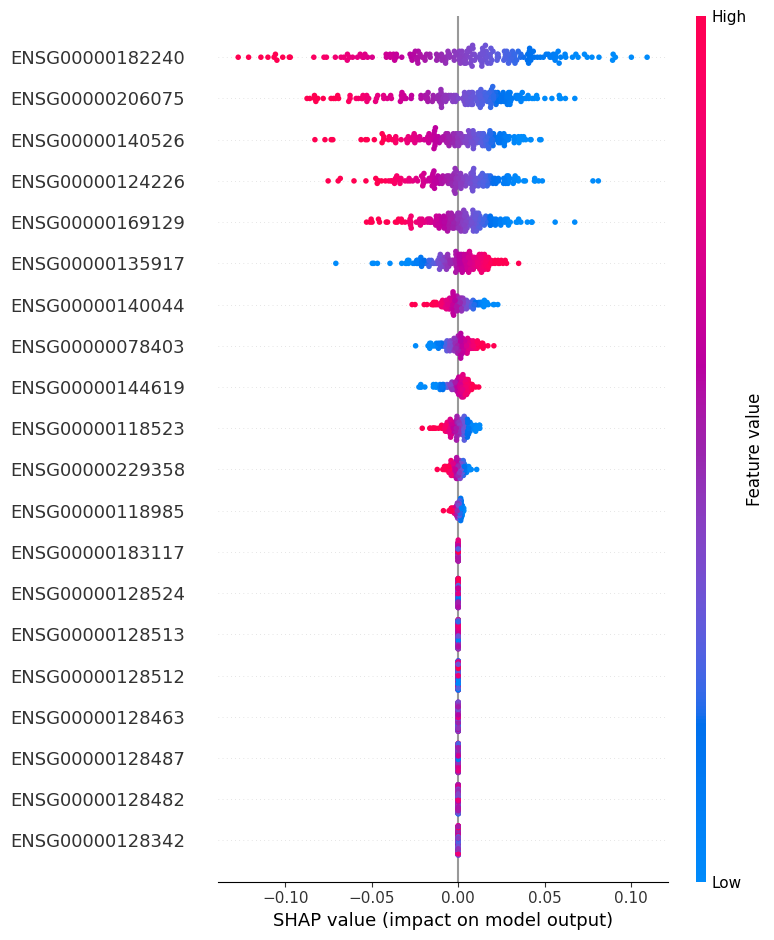

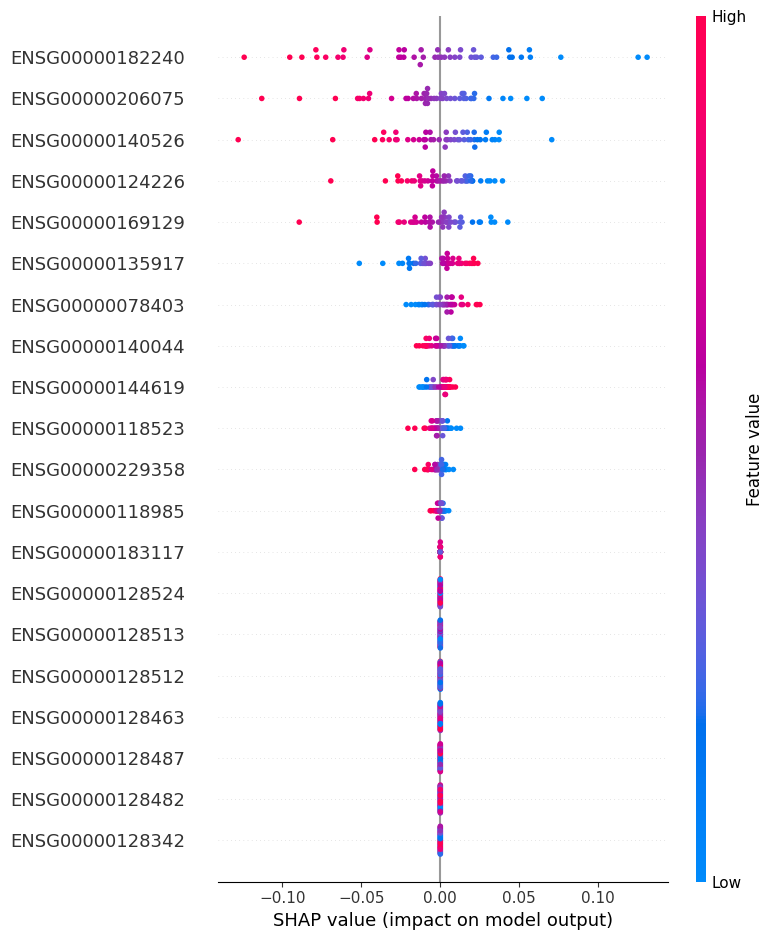

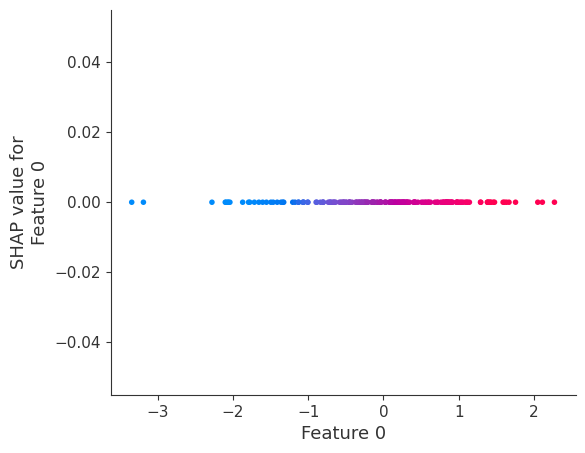

In [251]:
# Summary plot for the training set
shap.summary_plot(shap_values_train, X_train_scaled, feature_names=X.columns)

# Summary plot for the test set
shap.summary_plot(shap_values_test, X_test_scaled, feature_names=X.columns)

# SHAP dependence plot for a specific feature (e.g., the most important feature)
most_important_feature = shap_values_train.feature_names[0]
shap.dependence_plot(most_important_feature, shap_values_train.values, X_train_scaled)

# Force plot for a single prediction
shap.initjs()
shap.force_plot(shap_values_test[0].base_values, shap_values_test[0].values, X_test_scaled[0], feature_names=X.columns)
